In [76]:
!pip install scikit-learn dotenv

Defaulting to user installation because normal site-packages is not writeable


In [95]:
import os 
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
from skyfield.api import Topos
import json
from skyfield.api import load, wgs84, EarthSatellite, Topos
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [78]:
load_dotenv()

# Parse user location from .env
latitude = float(os.getenv('LATITUDE'))
longitude = float(os.getenv('LONGITUDE'))
elevation = float(os.getenv('ELEVATION'))

In [96]:
base_path = "output"

# Load connection periods
conn_path = f"{base_path}/connection_periods.csv"
if not os.path.exists(conn_path):
    print("Could not find connection_periods.csv")
else:
    df_conn_periods = pd.read_csv(conn_path)

# Load serving satellite data
serving_path = f"{base_path}/combined_serving_satellite.csv"
if not os.path.exists(serving_path):
    print("Could not find combined_serving_satellite.csv")
else:
    df_serving_satellite = pd.read_csv(serving_path)

# Load handover visibility JSON
handover_path = f"{base_path}/handover_visibility.json"
if not os.path.exists(handover_path):
    print("Could not find handover_visibility.json")
else:
    with open(handover_path, 'r') as f:
        handover_visibility = json.load(f)



In [99]:
print(f"df_conn_periods.columns: {df_conn_periods.columns}")
print(f"df_serving_satellite.columns: {df_serving_satellite.columns}")

# first and last row
print(df_conn_periods.iloc[0])
print(df_conn_periods.iloc[-1])
print(df_serving_satellite.iloc[0])
print(df_serving_satellite.iloc[-1])


print(f"handover_visibility.keys(): {handover_visibility.keys()}")


df_conn_periods.columns: Index(['Satellite', 'Start_Time', 'End_Time', 'Duration_Seconds',
       'Mean_Altitude_km', 'TLE_Line1', 'TLE_Line2', 'TLE_Timestamp'],
      dtype='object')
df_serving_satellite.columns: Index(['Timestamp', 'Connected_Satellite', 'Distance', 'TLE_Line1',
       'TLE_Line2', 'TLE_Timestamp', 'Altitude_km', 'hardwareVersion', 'sinr',
       'popPingLatencyMs', 'downlinkThroughputBps', 'uplinkThroughputBps',
       'tiltAngleDeg', 'boresightAzimuthDeg', 'boresightElevationDeg',
       'attitudeEstimationState', 'attitudeUncertaintyDeg',
       'desiredBoresightAzimuthDeg', 'desiredBoresightElevationDeg',
       'quaternion_qScalar', 'quaternion_qX', 'quaternion_qY',
       'quaternion_qZ'],
      dtype='object')
Satellite                                                                   STARLINK-2460
Start_Time                                                      2025-05-31 17:00:12+00:00
End_Time                                                        2025-05-31

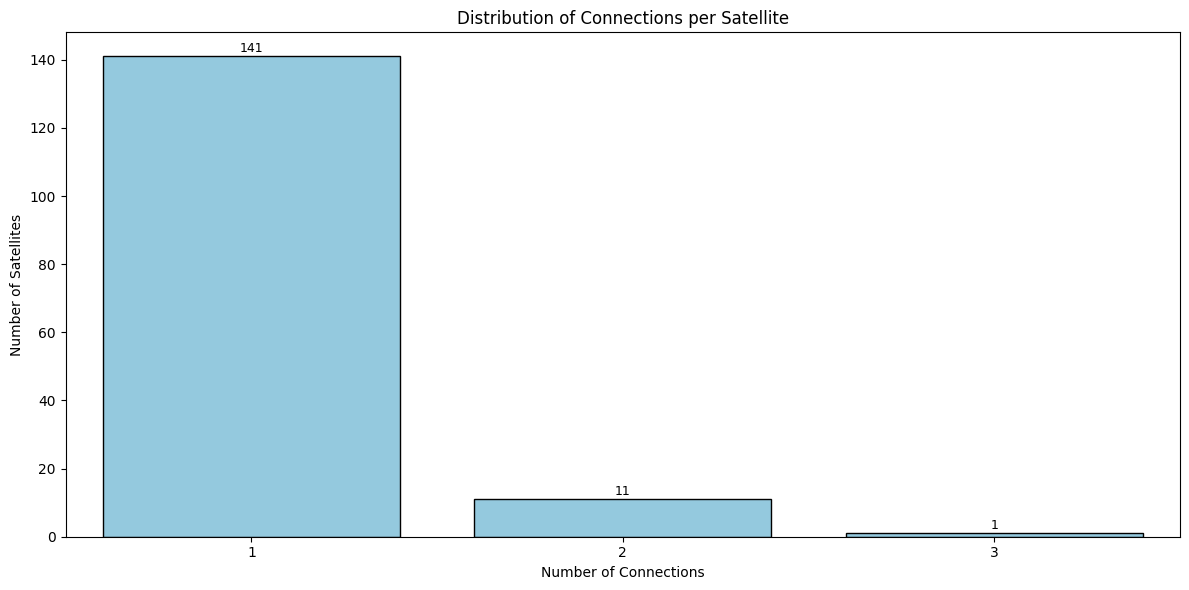

In [100]:
# Get count of satellites by number of connections
connection_distribution = df_conn_periods['Satellite'].value_counts().value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=connection_distribution.index, y=connection_distribution.values, color='skyblue', edgecolor='black')

# Label each bar
for i, v in enumerate(connection_distribution.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Connections')
plt.ylabel('Number of Satellites')
plt.title('Distribution of Connections per Satellite')
plt.tight_layout()
plt.show()

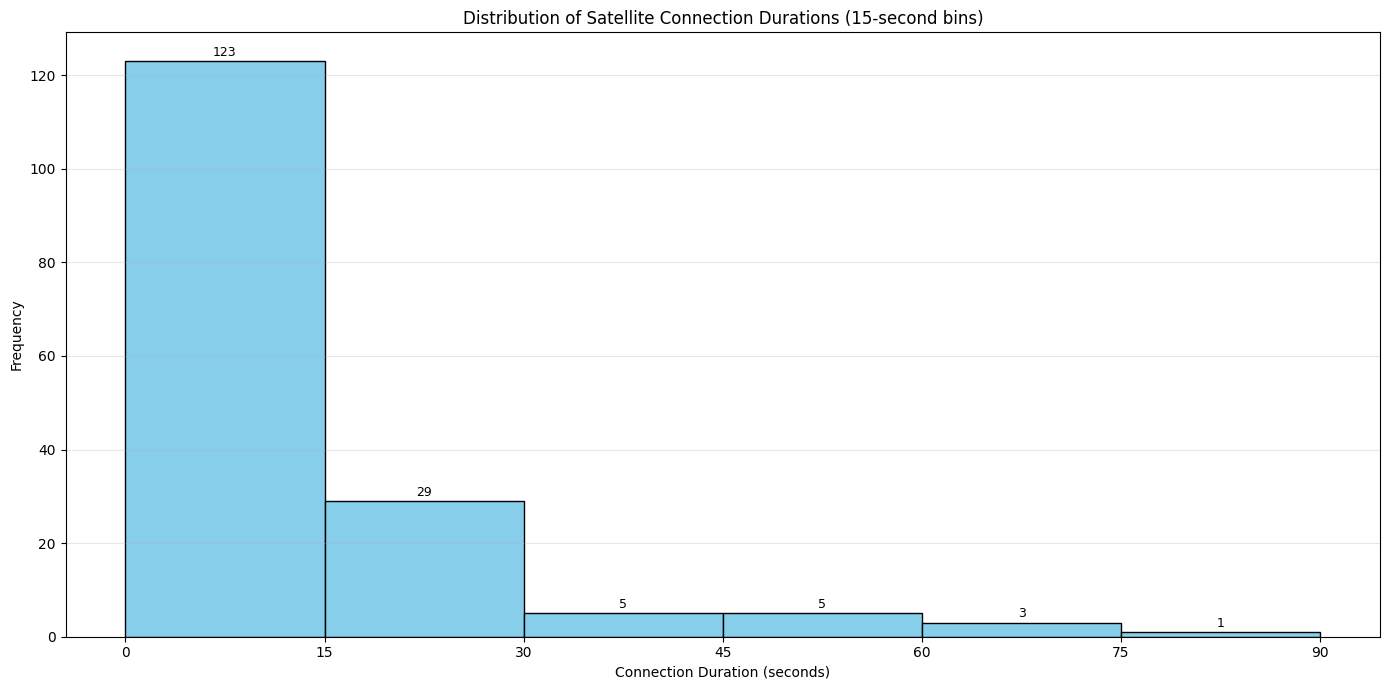

In [101]:
import matplotlib.pyplot as plt
import numpy as np

durations_filtered = df_conn_periods['Duration_Seconds']

# Define bins divisible by 15 seconds from min to max duration
min_dur = 0
max_dur = np.ceil(durations_filtered.max() / 15) * 15
bins = np.arange(min_dur, max_dur + 15, 15)  # bins edges: 0,15,30,...

# Histogram counts and bin edges
counts, bin_edges = np.histogram(durations_filtered, bins=bins)

plt.figure(figsize=(14, 7))
bars = plt.bar(bin_edges[:-1], counts, width=15, color='skyblue', edgecolor='black', align='edge')

plt.xlabel('Connection Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Satellite Connection Durations (15-second bins)')
plt.xticks(bin_edges)  # show all bin edges as x ticks
plt.grid(True, alpha=0.3, axis='y')

# Label bars on top
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



In [102]:

# Get unique satellite names and their connection counts
satellite_names = df_conn_periods['Satellite'].unique()
satellite_names = [name for name in satellite_names if name != '']
print(f"Number of unique satellite names: {len(satellite_names)}")


# Get top 10 most frequently seen satellites
satellite_counts = df_conn_periods['Satellite'].value_counts()
satellite_counts = satellite_counts[satellite_counts.index != '']
top_10_satellites = satellite_counts.head(10)

# For each top satellite, show connection durations
print("\nTop 10 satellites and their connection durations:")
for satellite in top_10_satellites.index:
    satellite_data = df_conn_periods[df_conn_periods['Satellite'] == satellite]
    print(f"\n{satellite} (seen {top_10_satellites[satellite]} times):")
    print(satellite_data[['Start_Time', 'End_Time', 'Duration_Seconds']].to_string(index=False))

Number of unique satellite names: 153

Top 10 satellites and their connection durations:

STARLINK-2468 (seen 3 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:05:57+00:00 2025-05-31 17:06:11+00:00              14.0
2025-05-31 17:06:57+00:00 2025-05-31 17:07:11+00:00              14.0
2025-05-31 17:07:42+00:00 2025-05-31 17:08:11+00:00              29.0

STARLINK-3339 (seen 2 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:05:27+00:00 2025-05-31 17:05:41+00:00              14.0
2025-05-31 17:07:12+00:00 2025-05-31 17:07:26+00:00              14.0

STARLINK-2686 (seen 2 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:43:57+00:00 2025-05-31 17:44:11+00:00              14.0
2025-05-31 17:45:27+00:00 2025-05-31 17:45:41+00:00              14.0

STARLINK-5291 (seen 2 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:33:

In [103]:

# Get unique satellite names and their connection counts
satellite_names = df_conn_periods['Satellite'].unique()
satellite_names = [name for name in satellite_names if name != '']
print(f"Number of unique satellite names: {len(satellite_names)}")


# Get top 10 most frequently seen satellites
satellite_counts = df_conn_periods['Satellite'].value_counts()
satellite_counts = satellite_counts[satellite_counts.index != '']
top_10_satellites = satellite_counts.tail(10)

# For each top satellite, show connection durations
print("\nTop 10 satellites and their connection durations:")
for satellite in top_10_satellites.index:
    satellite_data = df_conn_periods[df_conn_periods['Satellite'] == satellite]
    print(f"\n{satellite} (seen {top_10_satellites[satellite]} times):")
    print(satellite_data[['Start_Time', 'End_Time', 'Duration_Seconds']].to_string(index=False))

Number of unique satellite names: 153

Top 10 satellites and their connection durations:

STARLINK-32517 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:54:57+00:00 2025-05-31 17:55:26+00:00              29.0

STARLINK-3826 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:53:57+00:00 2025-05-31 17:54:11+00:00              14.0

STARLINK-33811 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:55:27+00:00 2025-05-31 17:55:41+00:00              14.0

STARLINK-30549 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:55:42+00:00 2025-05-31 17:56:11+00:00              29.0

STARLINK-2472 (seen 1 times):
               Start_Time                  End_Time  Duration_Seconds
2025-05-31 17:56:42+00:00 2025-05-31 17:57:11+00:00              29.0

STARLINK-2495 (seen 1 times):
               Start_T


--- TLE Info ---
TLE Timestamp: 2025-05-31 17:00:00+00:00
TLE Line 1: 1 55273U 23010E   25151.12235989 -.00000434  00000+0 -28557-4 0  9994
TLE Line 2: 2 55273  70.0003  36.7723 0002508 268.7076  91.3795 14.98328284130156
Start time: 2025-05-31 17:33:42+00:00, Elevation: 47.91120568480935, Azimuth: 239.3456633246916
End time: 2025-05-31 17:33:56+00:00, Elevation: 53.395966088649544, Azimuth: 246.59858651721808

--- TLE Info ---
TLE Timestamp: 2025-05-31 17:00:00+00:00
TLE Line 1: 1 55273U 23010E   25151.12235989 -.00000434  00000+0 -28557-4 0  9994
TLE Line 2: 2 55273  70.0003  36.7723 0002508 268.7076  91.3795 14.98328284130156
Start time: 2025-05-31 17:34:57+00:00, Elevation: 63.667237043432316, Azimuth: 323.6387941168596
End time: 2025-05-31 17:35:11+00:00, Elevation: 59.22304936609906, Azimuth: 339.719617793435


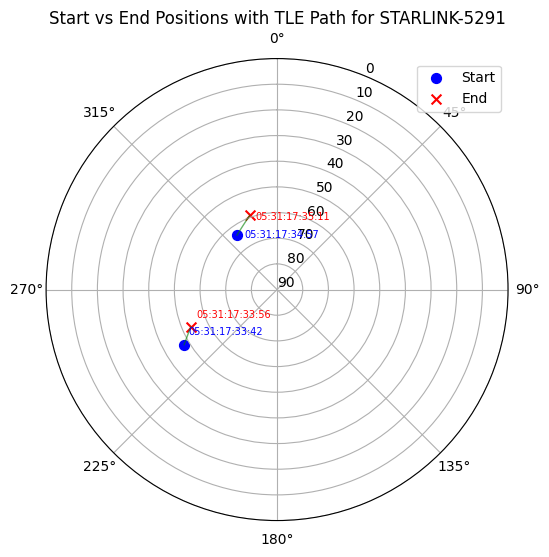

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from skyfield.api import load, EarthSatellite, wgs84
import pandas as pd

ts = load.timescale()
user_location = wgs84.latlon(latitude, longitude, elevation_m=elevation)

# Filter just one satellite RANDOM
random_sat = df_conn_periods['Satellite'].unique()[np.random.randint(0, len(df_conn_periods['Satellite'].unique()))]
single_sat = df_conn_periods[df_conn_periods['Satellite'] == random_sat]

azimuths_start = []
elevations_start = []
azimuths_end = []
elevations_end = []
start_times = []
end_times = []

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

for _, row in single_sat.iterrows():
    tle_timestamp = row['TLE_Timestamp']
    tle_line1 = row['TLE_Line1']
    tle_line2 = row['TLE_Line2']
    start_time_dt = pd.to_datetime(row['Start_Time'])
    end_time_dt = pd.to_datetime(row['End_Time'])


    print("\n--- TLE Info ---")
    print(f"TLE Timestamp: {tle_timestamp}")
    print(f"TLE Line 1: {tle_line1}")
    print(f"TLE Line 2: {tle_line2}")

    satellite = EarthSatellite(tle_line1, tle_line2, random_sat, ts)

    # Start time
    t_start = ts.from_datetime(start_time_dt)
    topocentric_start = (satellite - user_location).at(t_start)
    alt_start, az_start, _ = topocentric_start.altaz()
    az_start_rad = np.radians(az_start.degrees)
    azimuths_start.append(az_start_rad)
    elevations_start.append(alt_start.degrees)
    start_times.append(start_time_dt.strftime("%H:%M"))

    print(f"Start time: {start_time_dt}, Elevation: {alt_start.degrees}, Azimuth: {az_start.degrees}")

    # End time
    t_end = ts.from_datetime(end_time_dt)
    topocentric_end = (satellite - user_location).at(t_end)
    alt_end, az_end, _ = topocentric_end.altaz()
    az_end_rad = np.radians(az_end.degrees)
    azimuths_end.append(az_end_rad)
    elevations_end.append(alt_end.degrees)
    end_times.append(end_time_dt.strftime("%H:%M"))

    print(f"End time: {end_time_dt}, Elevation: {alt_end.degrees}, Azimuth: {az_end.degrees}")

    # --- Draw TLE curve between start and end ---
    time_array = ts.linspace(t_start, t_end, 50)

    # Get azimuths and elevations for all points
    az_list_deg = []
    el_list = []
    
    for t in time_array:
        topo = (satellite - user_location).at(t)
        alt, az, _ = topo.altaz()
        az_list_deg.append(az.degrees)
        el_list.append(alt.degrees)
    
    # Convert to radians and unwrap
    az_list_rad = np.unwrap(np.radians(az_list_deg))

    ax.plot(az_list_rad, el_list, color='green', alpha=0.6, linewidth=1)

# Plot start points
ax.scatter(azimuths_start, elevations_start, c='blue', s=50, label='Start')

# Plot end points
ax.scatter(azimuths_end, elevations_end, c='red', s=50, marker='x', label='End')

# Add labels for start times (small text, slightly offset)
# Format times with full date and time
start_times = [pd.to_datetime(t).strftime("%m:%d:%H:%M:%S") for t in single_sat['Start_Time']]
end_times = [pd.to_datetime(t).strftime("%m:%d:%H:%M:%S") for t in single_sat['End_Time']]


# Add labels for start times (offset to top-right)
for az, el, t_str in zip(azimuths_start, elevations_start, start_times):
    # Offset: +3 degrees elevation, +0.05 radians azimuth to right
    ax.text(az + 0.05, el + 3, t_str, fontsize=7, color='blue', ha='left', va='bottom')

# Add labels for end times (offset to top-right)
for az, el, t_str in zip(azimuths_end, elevations_end, end_times):
    # Offset: +3 degrees elevation, +0.05 radians azimuth to right
    ax.text(az + 0.05, el + 3, t_str, fontsize=7, color='red', ha='left', va='bottom')


ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(90, 0)  # 90° center, 0° edge

plt.title(f'Start vs End Positions with TLE Path for {random_sat}')
plt.legend()
plt.show()




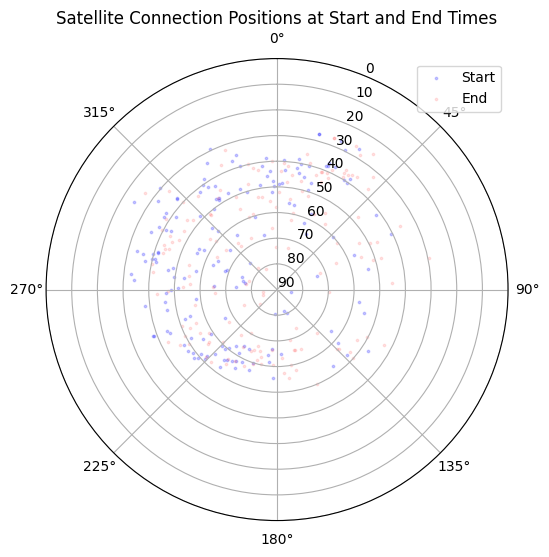

In [86]:
# Ensure timescale and user location are initialized
ts = load.timescale()
user_location = wgs84.latlon(latitude, longitude, elevation_m=elevation)

# Initialize lists for azimuths and elevations at connection start and end
azimuths_start = []
elevations_start = []
azimuths_end = []
elevations_end = []

# Iterate through all rows in the DataFrame
for _, row in df_conn_periods.iterrows():
    tle_line1 = row['TLE_Line1']
    tle_line2 = row['TLE_Line2']
    sat_name = row['Satellite']
    start_time_dt = pd.to_datetime(row['Start_Time'])
    end_time_dt = pd.to_datetime(row['End_Time'])

    # Create satellite object
    satellite = EarthSatellite(tle_line1, tle_line2, sat_name, ts)

    # Compute satellite's position at start time relative to observer
    t_start = ts.from_datetime(start_time_dt)
    topocentric_start = (satellite - user_location).at(t_start)
    alt_start, az_start, _ = topocentric_start.altaz()

    if alt_start.degrees > 0:
        azimuths_start.append(np.radians(az_start.degrees))
        elevations_start.append(alt_start.degrees)

    # Compute satellite's position at end time relative to observer
    t_end = ts.from_datetime(end_time_dt)
    topocentric_end = (satellite - user_location).at(t_end)
    alt_end, az_end, _ = topocentric_end.altaz()

    if alt_end.degrees > 0:
        azimuths_end.append(np.radians(az_end.degrees))
        elevations_end.append(alt_end.degrees)

# Plot as polar
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Start times in blue
ax.scatter(azimuths_start, elevations_start, c='blue', s=3, alpha=0.2, label='Start')

# End times in red
ax.scatter(azimuths_end, elevations_end, c='red', s=3, alpha=0.1, label='End')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(90, 0)  # Center is zenith, edge is horizon

plt.title('Satellite Connection Positions at Start and End Times')
plt.legend()
plt.show()


Tilt angle: 25.28°
Boresight azimuth: 8.65°


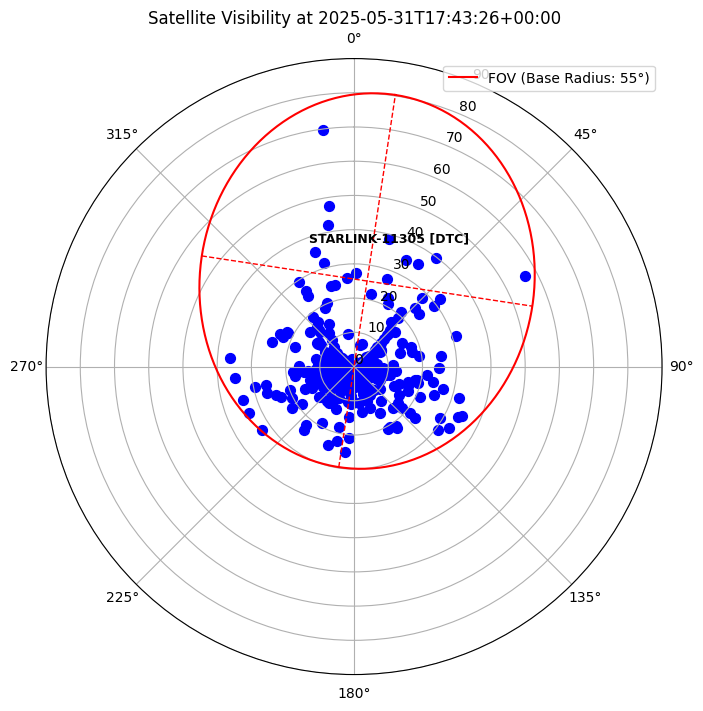

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math

# Pick a random timestamp from the handover visibility dictionary
timestamp_str = random.choice(list(handover_visibility.keys()))
timestamp_dt = pd.to_datetime(timestamp_str)
satellites = handover_visibility[timestamp_str]

# Find the connected satellite from df_serving_satellite
row = df_serving_satellite[pd.to_datetime(df_serving_satellite['Timestamp']) == timestamp_dt]
connected_sat = row.iloc[0]['Connected_Satellite'] if not row.empty else None

# Get antenna tilt and azimuth from the connected satellite entry
row_sat = df_serving_satellite[
    (pd.to_datetime(df_serving_satellite['Timestamp']) == timestamp_dt) & 
    (df_serving_satellite['Connected_Satellite'] == connected_sat)
]

if not row_sat.empty:
    tiltAngleDeg = row_sat.iloc[0].get('tiltAngleDeg', 0)
    boresightAzimuthDeg = row_sat.iloc[0].get('boresightAzimuthDeg', 0)
    print(f"Tilt angle: {tiltAngleDeg:.2f}°")
    print(f"Boresight azimuth: {boresightAzimuthDeg:.2f}°")
else:
    print(f"[!] No tilt/azimuth info for satellite '{connected_sat}' at {timestamp_str}")
    tiltAngleDeg, boresightAzimuthDeg = 0, 0

# Setup polar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
ax.set_ylim(0, 90)
ax.set_yticks(np.arange(0, 91, 10))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(True)

# Parameters for FOV ellipse
base_radius = 55  # FOV radius in degrees

# Calculate ellipse parameters with tilt adjustment
center_shift = tiltAngleDeg
x_radius = base_radius
y_radius = math.sqrt(base_radius**2 - tiltAngleDeg**2)  # Adjust vertical radius for tilt

# Generate ellipse points
theta = np.linspace(0, 2*np.pi, 300)
x = x_radius * np.cos(theta) + center_shift  # Shift center by tilt
y = y_radius * np.sin(theta)

# Rotate by boresight azimuth
rad_az = np.deg2rad(boresightAzimuthDeg)
x_rot = x * np.cos(rad_az) - y * np.sin(rad_az)
y_rot = x * np.sin(rad_az) + y * np.cos(rad_az)

# Convert to polar coordinates
r = np.sqrt(x_rot**2 + y_rot**2)
angles = np.arctan2(y_rot, x_rot)

# Plot the FOV ellipse
ax.plot(angles, r, 'r', label=f'FOV (Base Radius: {base_radius}°)')

# Plot major/minor axes
maj_x = np.array([-x_radius, x_radius]) + center_shift
maj_y = np.array([0, 0])
min_x = np.array([0, 0]) + center_shift
min_y = np.array([-y_radius, y_radius])

# Rotate axes
maj_x_rot = maj_x * np.cos(rad_az) - maj_y * np.sin(rad_az)
maj_y_rot = maj_x * np.sin(rad_az) + maj_y * np.cos(rad_az)
min_x_rot = min_x * np.cos(rad_az) - min_y * np.sin(rad_az)
min_y_rot = min_x * np.sin(rad_az) + min_y * np.cos(rad_az)

# Convert to polar and plot axes
maj_r = np.sqrt(maj_x_rot**2 + maj_y_rot**2)
maj_angles = np.arctan2(maj_y_rot, maj_x_rot)
min_r = np.sqrt(min_x_rot**2 + min_y_rot**2)
min_angles = np.arctan2(min_y_rot, min_x_rot)

ax.plot(maj_angles, maj_r, 'r--', linewidth=1)
ax.plot(min_angles, min_r, 'r--', linewidth=1)

# Plot visible satellites
for sat in satellites:
    elev = sat['sat_elevation_deg']
    az = np.deg2rad(sat['sat_azimuth_deg'])
    if sat['satellite'] == connected_sat:
        ax.scatter(az, elev, c='green', s=70, label='Connected Satellite')
        ax.text(az, elev, sat['satellite'], ha='center', va='center',
                fontsize=10, weight='bold', color='green')
    else:
        ax.scatter(az, elev, c='blue', s=50)

plt.title(f'Satellite Visibility at {timestamp_str}')
plt.legend()
plt.show()